# Retificador de onda completa (Carga R)

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 100 
Vm: 	 63.66197723675812 
Vrms: 	 70.71067811865476
# - Corrente na carga - # 
Ipk: 	 24.99987613508266 
Im: 	 15.91549430918953 
Irms: 	 17.67766952966369
# - Potências - # 
Ppk:	 2499.9752270779004 
P: 	 1250.0000000000002 
S: 	 1250.0
# - Fatores - # 
FP:	 1.0000000000000002 
THD V:	 0.0018850159739448916 
THD I:	 0.0018850159739448916


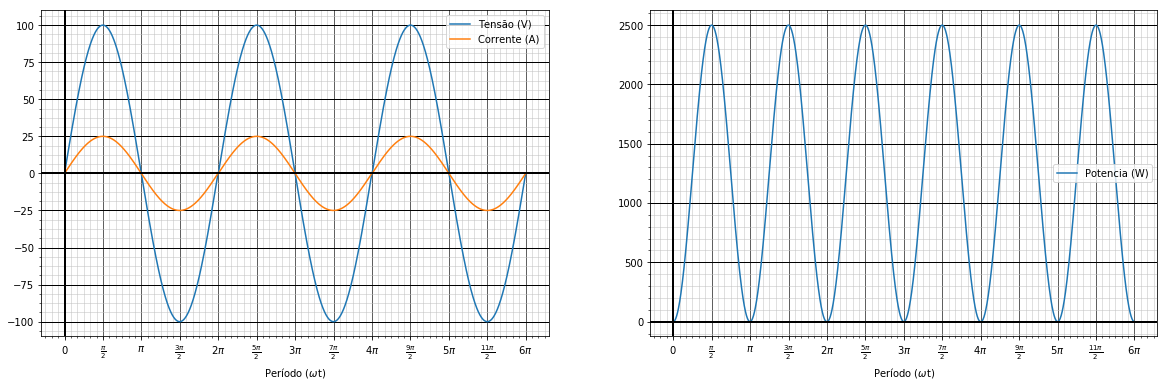

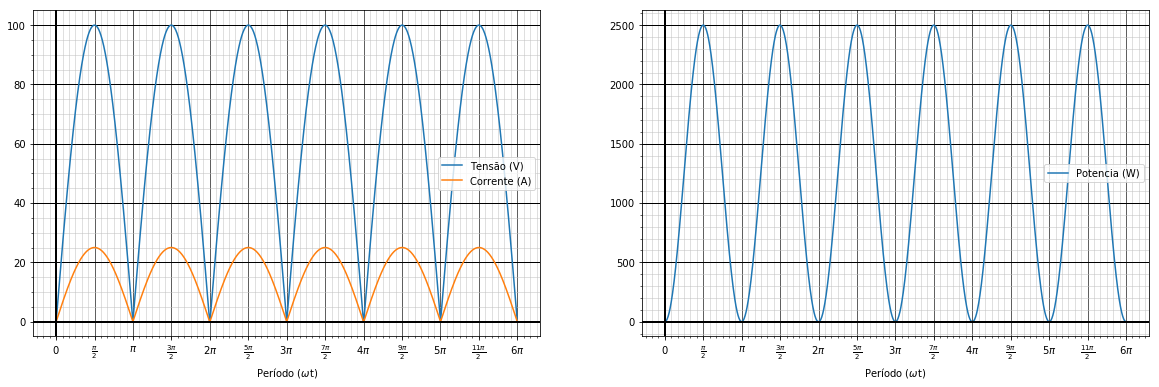

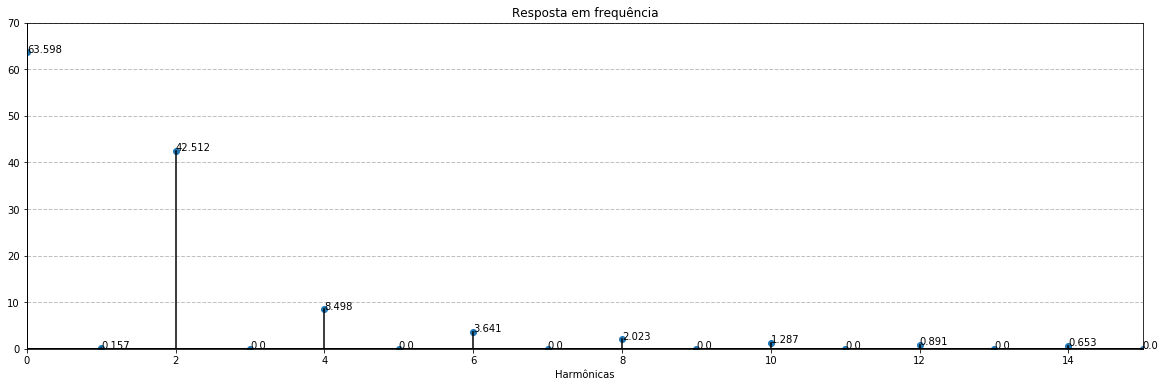

In [2]:
############# RETIFICADOR MEIA ONDA #############
#################### CARGA R ####################

V_pk = 100
R = 4

T = 2*pi
a = 0
b = pi

func_vin = f'{V_pk}*sin(x)'
Vin_media = calculo_medio(func_vin)
Vin_rms = calculo_rms(func_vin)

func_vout = f'{V_pk}*sin(x)*( heaviside(x - {a}, 0) - 2*heaviside(x - {b}, 0) + {eps} )'
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

func_iin = '(' + func_vin + f')/{R}'
Iin_media = calculo_medio(func_iin)
Iin_rms = calculo_rms(func_iin)

func_iout = '(' + func_vout + f')/{R}'
Iout_media = calculo_medio(func_iout)
Iout_rms = calculo_rms(func_iout)
I_pk = calculo_pk(func_iout)

func_p = '(' + func_vin + ')*(' + func_iin + ')'
P = calculo_medio(func_p)
S = Iin_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P         , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV      , "\nTHD I:\t", thdI)

plot_info(func_vin, func_iin, xlim=(0, T))
plot_info(func_vout, func_iout, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_vout, ax2, T=2*np.pi, n_harmonicas = 15)